# Hierarchical Clustering

# Challenge Session

## Task1 Hierarchical Clustering

### Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Loading Data

In [ ]:
#reading data file 
df1=pd.read_csv('/content/DS2_C6_S3_Cities_Data_Challenge.csv')
df2=pd.read_csv('/content/DS2_C6_S3_MoveHubCostOfLiving_Data_Challenge.csv')
df3=pd.read_csv('/content/DS2_C6_S3_MoveHubQualityOfLife_Data_Challenge.csv')
df4=pd.read_csv('/content/DS2_C6_S3_WorldCities_Data_Challenge.csv')

### TAsk 2

In [ ]:
#renaming city col as City in worldcities dataset

df4.rename(columns = {'city':'City'}, inplace = True)

#renaming country col as Country in worldcities dataset

df4.rename(columns = {'country':'Country'}, inplace = True)

In [ ]:
#sort df based on Population in desc
sorted_df4 = df4.sort_values(by=['population'], ascending=False)
sorted_df4.head()

,City,city_ascii,lat,lng,Country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [ ]:
#merging dataframes
# merge function can at a time takes only 2 data frames

df = pd.merge(df1,df2,on=['City'])
df = pd.merge(df,df3,on=['City'])
df = pd.merge(df,df4,on=['City','Country'],how='left')
df.columns

Index(['City', 'Country', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline',
       'Avg Rent', 'Avg Disposable Income', 'Movehub Rating', 'Purchase Power',
       'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating',
       'city_ascii', 'lat', 'lng', 'iso2', 'iso3', 'admin_name', 'capital',
       'population', 'id'],
      dtype='object')

In [ ]:
df.head()

,City,Country,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,...,Crime Rating,city_ascii,lat,lng,iso2,iso3,admin_name,capital,population,id
0,Orlando,United States,1.96,5.88,7.52,0.66,1176.78,2013.61,84.39,71.07,...,55.07,Orlando,28.4772,-81.3369,US,USA,Florida,NaN,1822394.0,1.840015e+09
1,Oslo,Norway,3.36,11.20,12.32,1.57,2016.66,2800.92,82.09,52.51,...,35.53,Oslo,59.9111,10.7528,NO,NOR,Oslo,primary,693494.0,1.578325e+09
2,Ottawa,Canada,2.39,7.65,9.56,0.80,1020.02,2900.68,87.69,91.85,...,22.25,Ottawa,45.4247,-75.6950,CA,CAN,Ontario,NaN,989567.0,1.124399e+09
3,Oxford,United Kingdom,2.49,7.97,7.97,1.36,1494.67,1693.96,80.94,50.33,...,24.22,Oxford,51.7519,-1.2578,GB,GBR,Oxfordshire,NaN,154600.0,1.826690e+09
4,Quito,Ecuador,1.22,2.94,6.54,0.29,310.54,196.13,67.15,14.24,...,48.36,Quito,-0.2186,-78.5097,EC,ECU,Pichincha,primary,2011388.0,1.218442e+09


In [ ]:
data_df=df

In [ ]:
(df.isna().sum()) 

City                      0
Country                   0
Cappuccino                0
Cinema                    0
Wine                      0
Gasoline                  0
Avg Rent                  0
Avg Disposable Income     0
Movehub Rating            0
Purchase Power            0
Health Care               0
Pollution                 0
Quality of Life           0
Crime Rating              0
city_ascii               13
lat                      13
lng                      13
iso2                     13
iso3                     13
admin_name               14
capital                  84
population               13
id                       13
dtype: int64

In [ ]:
#converting non int type to category
data_df['City']=data_df['City'].astype('category')
data_df['Country']=data_df['Country'].astype('category')
data_df['city_ascii']=data_df['city_ascii'].astype('category')
data_df['iso2']=data_df['iso2'].astype('category')
data_df['iso3']=data_df['iso3'].astype('category')
data_df['admin_name']=data_df['admin_name'].astype('category')
data_df['capital']=data_df['capital'].astype('category')

In [ ]:
# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data_df['City_encode']= label_encoder.fit_transform(data_df['City'])
data_df['City_encode'].unique()

data_df['Country_encode']= label_encoder.fit_transform(data_df['Country'])
data_df['Country_encode'].unique()

data_df['city_ascii_encode']= label_encoder.fit_transform(data_df['city_ascii'])
data_df['city_ascii_encode'].unique()

data_df['iso2_encode']= label_encoder.fit_transform(data_df['iso2'])
data_df['iso2_encode'].unique()

data_df['iso3_encode']= label_encoder.fit_transform(data_df['iso3'])
data_df['iso3_encode'].unique()

data_df['admin_name_encode']= label_encoder.fit_transform(data_df['admin_name'])
data_df['admin_name_encode'].unique()

data_df['capital_encode']= label_encoder.fit_transform(data_df['capital'])
data_df['capital_encode'].unique()

array([3, 2, 0, 1])

In [ ]:
#imputation based method to fill in missing values of each column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = data_df.select_dtypes(include=numerics)
from sklearn.impute import KNNImputer
imputer= KNNImputer(n_neighbors=5)
#df_filled=imputer.fit_transform(new_df).toseries()
df_filled = pd.DataFrame(imputer.fit_transform(new_df),columns=new_df.columns)
df_filled.columns

Index(['Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg Rent',
       'Avg Disposable Income', 'Movehub Rating', 'Purchase Power',
       'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating', 'lat',
       'lng', 'population', 'id', 'City_encode', 'Country_encode',
       'city_ascii_encode', 'iso2_encode', 'iso3_encode', 'admin_name_encode',
       'capital_encode'],
      dtype='object')

In [ ]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
 numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
 new_data_df = df_filled.select_dtypes(include=numerics)
 new_data_df1 = new_data_df.drop(['lat', 'lng'], axis=1)
 if scale == 'minmax':
     scaler = MinMaxScaler()
 else:
     scaler = StandardScaler()
 df_scaled = pd.DataFrame(scaler.fit_transform(new_data_df1.to_numpy()),columns=new_data_df1.columns)
 return df_scaled

In [ ]:
# scaling the data using MinMax Scaling process
scale = 'MinMax' 
data_df_scaled=feature_scale(scale)
data_df_scaled
data_df1=data_df_scaled
data_df1.head(10)

,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,...,Crime Rating,population,id,City_encode,Country_encode,city_ascii_encode,iso2_encode,iso3_encode,admin_name_encode,capital_encode
0,-0.084698,-0.180700,0.108051,-0.989261,0.123436,0.617140,0.680717,1.148558,0.649070,0.936628,...,0.850346,-0.282835,1.142889,0.837450,1.135845,0.704467,1.129833,1.152270,-0.793394,0.988242
1,1.792998,0.774603,1.559777,1.577460,1.400798,1.489470,0.322198,0.250232,1.484365,-0.685569,...,-0.377506,-0.467533,0.223991,0.855831,0.053483,0.722860,0.274367,0.266135,0.505153,0.171544
2,0.492023,0.137136,0.725035,-0.594381,-0.114979,1.600003,1.195114,2.154335,-0.036037,-0.522408,...,-1.211994,-0.419093,-1.369919,0.874211,-1.338126,0.741253,-1.232883,-1.224184,0.466390,0.988242
3,0.626144,0.194598,0.244150,0.985140,0.606910,0.262972,0.142938,0.144717,-0.023693,-1.388024,...,-1.088203,-0.555701,1.096098,0.892592,1.097189,0.759645,-0.662572,-0.660279,0.524534,0.988242
4,-1.077195,-0.708630,-0.188343,-2.032873,-1.194017,-1.396605,-2.006619,-1.602082,-2.340985,-1.259378,...,0.428704,-0.251914,-1.039699,1.039637,-0.990224,0.888394,-0.906991,-0.901953,0.602059,0.171544
5,-0.433413,-0.011906,-0.980744,0.646671,0.148834,-0.197109,0.833477,0.325738,0.477622,0.349092,...,-0.138094,-0.046627,0.737681,0.377935,0.749287,0.281434,-0.825518,-0.821395,-0.056905,0.171544
6,0.773677,-0.302806,3.764587,-2.371341,-0.025703,-0.310057,-0.383930,-0.342683,0.389154,-1.169168,...,-1.366575,-0.555231,-1.634713,0.396316,-1.608717,0.299827,-1.395829,-1.385299,-1.723697,0.171544
7,0.505435,0.199985,-0.351663,0.392819,0.158751,-0.075418,0.291022,0.724564,-0.351502,-1.838285,...,-1.089460,-0.138433,1.094541,0.414696,1.097189,0.318220,-0.662572,-0.660279,-0.018142,0.988242
8,-0.594359,-0.739156,-0.729716,-0.425147,-0.462258,-1.368307,-1.825801,-1.574977,0.961105,0.719734,...,1.559785,3.196408,0.330363,0.433077,0.208106,0.336612,0.437313,0.467529,0.001239,0.171544
9,-0.433413,0.278995,-0.877913,0.872317,-0.110477,-0.244331,0.248935,0.469973,0.753310,-0.834610,...,0.360210,-0.438652,-0.926168,0.451458,-0.835601,0.355005,-0.703309,-0.700558,0.640822,-1.461852


In [ ]:
#Data frame after adding lat,lng columns
col=df_filled[['lat','lng']]
type(col)
frames=[data_df1,col]
#data_df=pd.merge(data_df,col) merge can be performed on common cols
data_df2=pd.concat(frames,axis=1)

###Task4

### Building Model with 2 features

In [ ]:
X1=data_df2[['Health Care','Quality of Life']]

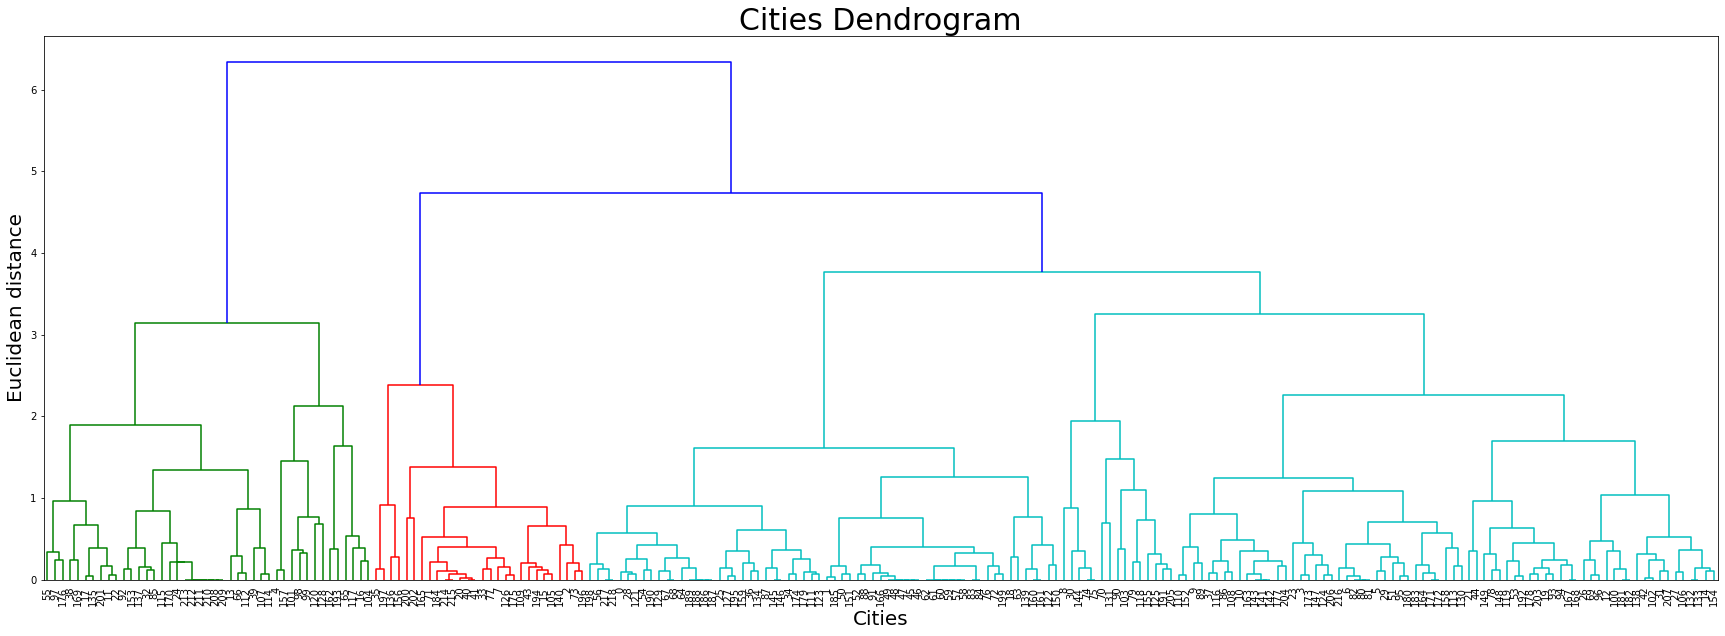

In [ ]:

plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X1, method = 'complete'),labels=data_df1.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Cities Dendrogram',fontsize=30)
plt.xlabel('Cities',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [ ]:
hc1 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc1 = hc1.fit_predict(X1)

Text(0, 0.5, 'Quality of Life')

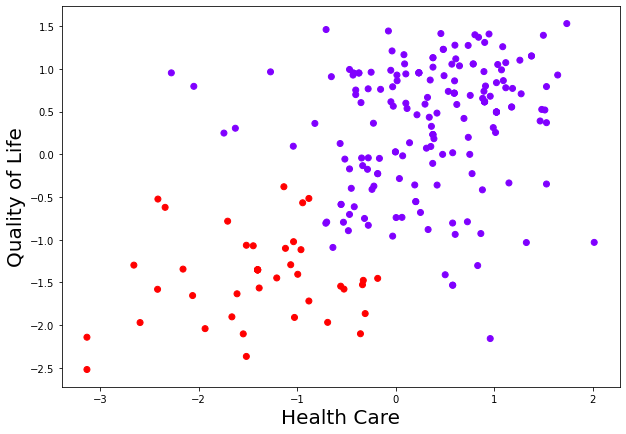

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(data_df1['Health Care'], data_df1['Quality of Life'], c=hc1.labels_, cmap='rainbow')
plt.xlabel('Health Care',fontsize=20)
plt.ylabel('Quality of Life', fontsize=20)

The above plot shows that the quality of life is good when the Health care facility is well established

### TAsk 4

### Modelling for the entire data

### Plotting Dendogram

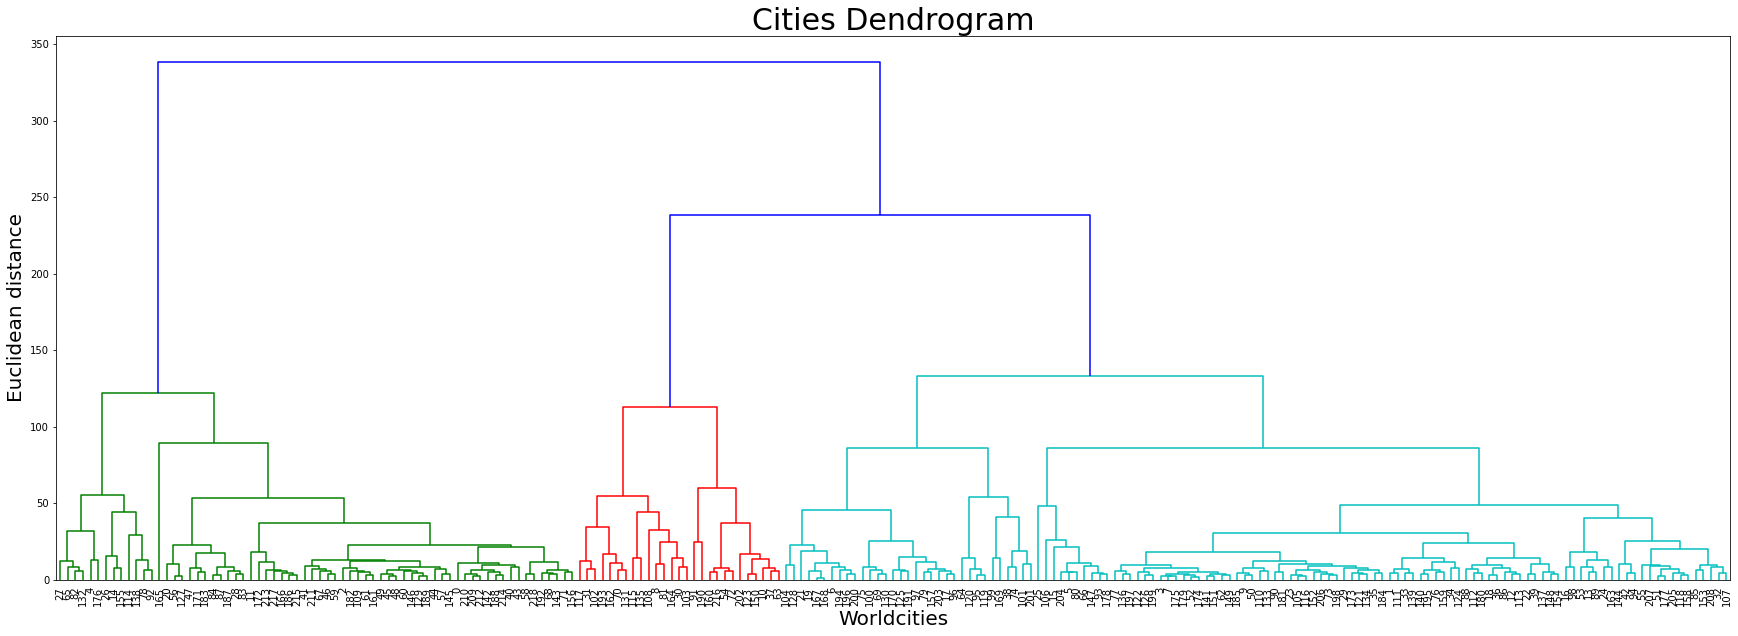

In [ ]:
X=data_df2

plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'complete'),labels=data_df1.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Cities Dendrogram',fontsize=30)
plt.xlabel('Worldcities',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

The vertical line with maximum distance is the
blue line and hence we can decide a threshold of 28 to cut the dendrogram into 2 clusters

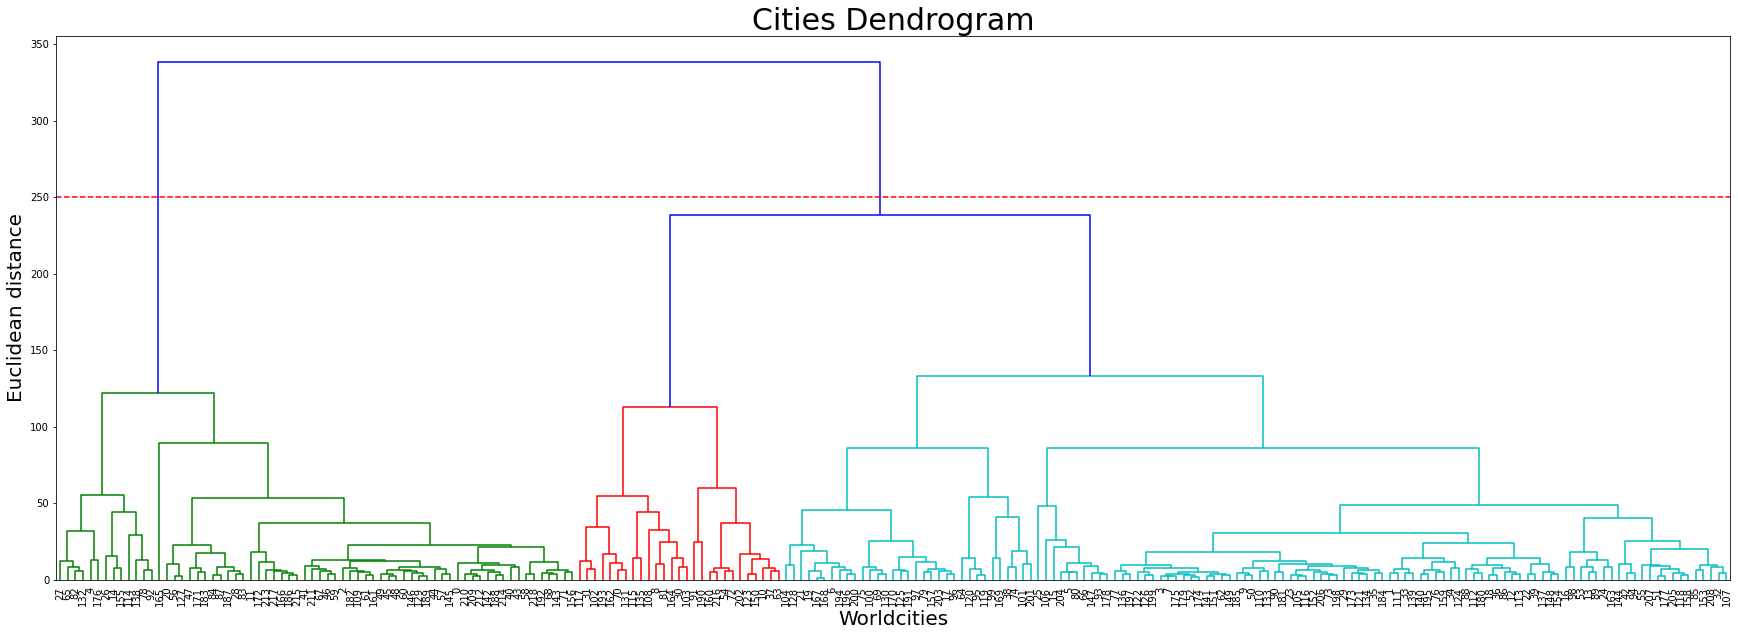

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'complete'),labels=data_df1.index)
plt.axhline(y=250, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Cities Dendrogram',fontsize=30)
plt.xlabel('Worldcities',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### Model Building

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)

### Task 4 :Visualising Clusters

Text(0, 0.5, 'Quality of Life')

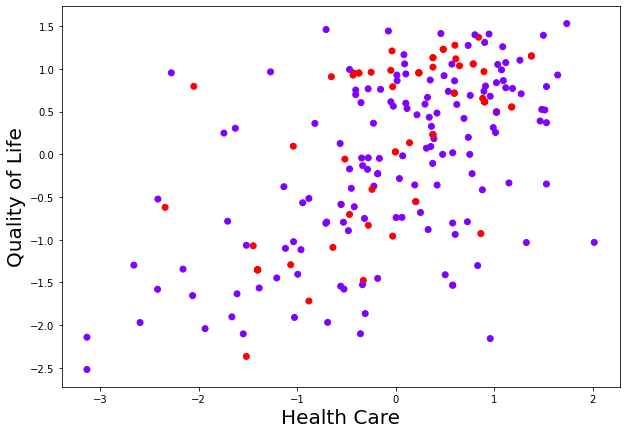

In [32]:
plt.figure(figsize=(10, 7))

plt.scatter(data_df1['Health Care'], data_df1['Quality of Life'], c=hc.labels_, cmap='rainbow')
plt.xlabel('Health Care',fontsize=20)
plt.ylabel('Quality of Life', fontsize=20)

The same plot above shows better distinction between the classes as the model is trained exclusively using the two parameters
In this case, since the model is trained on the whole of data, the clustering is affected by noise

Text(0, 0.5, 'Avg rent')

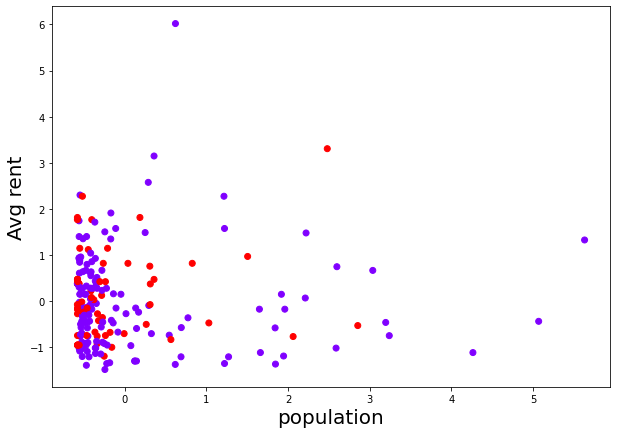

In [37]:
plt.figure(figsize=(10, 7))

plt.scatter(data_df1['population'], data_df1['Avg Rent'], c=hc.labels_, cmap='rainbow')
plt.xlabel('population',fontsize=20)
plt.ylabel('Avg rent',fontsize=20)

In [39]:
df.columns


Index(['City', 'Country', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline',
       'Avg Rent', 'Avg Disposable Income', 'Movehub Rating', 'Purchase Power',
       'Health Care', 'Pollution', 'Quality of Life', 'Crime Rating',
       'city_ascii', 'lat', 'lng', 'iso2', 'iso3', 'admin_name', 'capital',
       'population', 'id', 'City_encode', 'Country_encode',
       'city_ascii_encode', 'iso2_encode', 'iso3_encode', 'admin_name_encode',
       'capital_encode'],
      dtype='object')

The scatter plot is not very indicative that population affects the avg rent. They are not very much corelated

Text(0, 0.5, 'Health care')

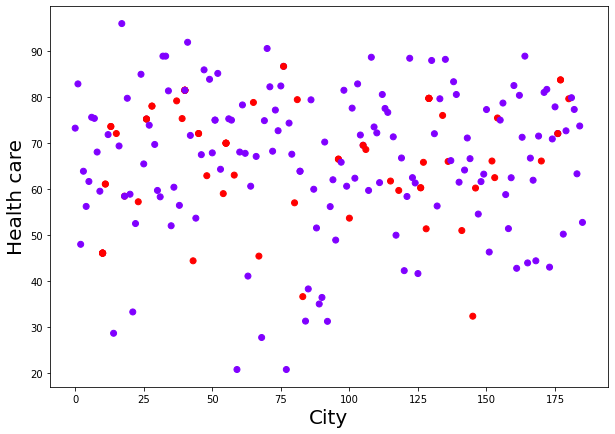

In [40]:
plt.figure(figsize=(10, 7))

plt.scatter(df['City_encode'], df['Health Care'], c=hc.labels_, cmap='rainbow')
plt.xlabel('City',fontsize=20)
plt.ylabel('Health care',fontsize=20)

The scatter plot shows most of the cities have a well built health care system